In [2]:
from pylab import rcParams
from osgeo import gdal
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# import numpy as np
import random as random
# import matplotlib.pyplot as plt
import time
import pandas as pd
import math
from scipy.spatial import distance#
from pyproj import Proj,transform
import seaborn as sns
import copy
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import multiprocessing
from datetime import datetime

## Previous Cases

In [3]:
Data=pd.read_csv("Case_data/cases.csv",sep = ',', header = 0)

In [4]:
Data_bang = Data[Data['country'] == 'B'].reset_index(drop = True)

#### read date

In [8]:
date_format = "%d/%m/%y"
duration = []
for i in range(len(Data_bang)):
    a = datetime.strptime(Data_bang['Start'][i], date_format)
    b = datetime.strptime(Data_bang['End'][i], date_format)
    delta = b - a
    duration.append(delta.days)

In [9]:
Data_bang['Duration'] = duration

# Distribution of fatality 

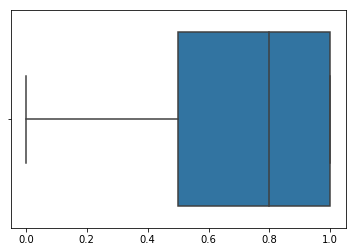

In [7]:
d = Data_bang['Deaths'].values 
c = Data_bang['Total Cases'].values
sns.boxplot(d/c)

# Boxplots of final size (total infections) and duration of outbreak

Text(0,0.5,'Final Size')

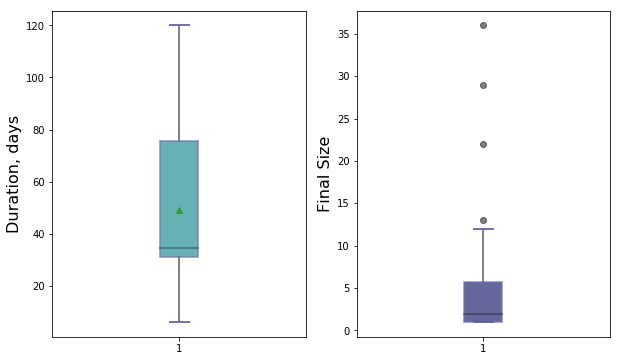

In [11]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(121)
bp = ax.boxplot(Data_bang['Duration'].values, patch_artist=True, showmeans = True)
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = 'teal' , alpha = 0.6)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='grey', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', alpha = 0.3, linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='yellow', alpha=0.5)

plt.ylabel('Duration, days', fontsize =16)
# plt.ylim([0,40])
ax = fig.add_subplot(122)
bp = ax.boxplot(Data_bang['Total Cases'].values, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#00035b' , alpha = 0.6)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='grey', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', alpha = 0.3, linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='yellow', alpha=0.5)

plt.ylabel('Final Size', fontsize = 16)

Text(0,0.5,'Duration')

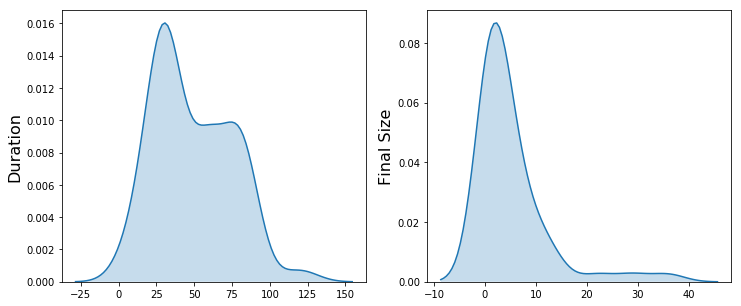

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,2)
sns.kdeplot(Data_bang['Total Cases'].values, shade = True)
plt.ylabel('Final Size', fontsize = 16)
plt.subplot(1,2,1)
sns.kdeplot(Data_bang['Duration'].values, shade = True)
plt.ylabel('Duration', fontsize =16)

# Mapping previous outbreaks (Raster files for density of people from worldpop)

In [14]:
lons_ban = Data['Long'][Data['country'] == 'B'].values
lats_ban =Data['Lat'][Data['country'] == 'B'].values

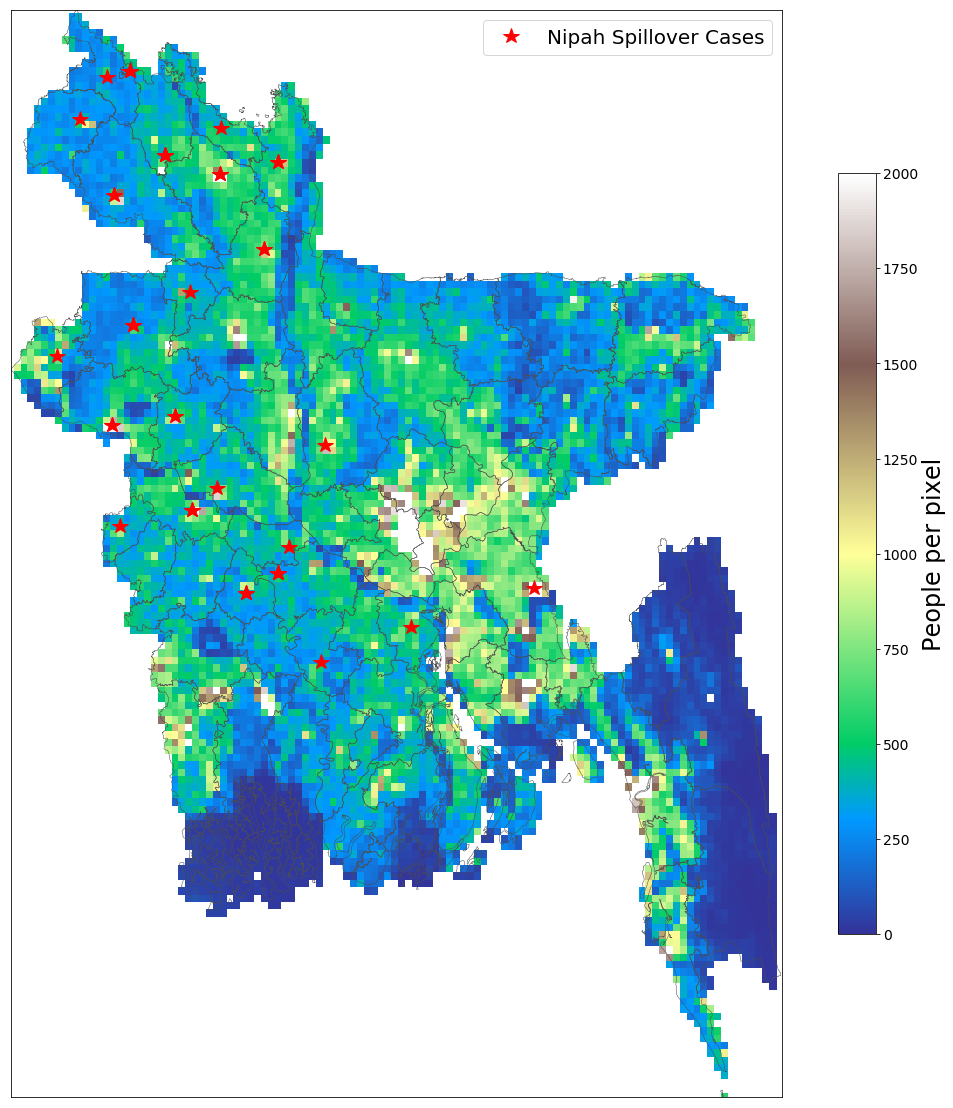

In [15]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
# pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/BGD_ppp_2010_adj_v2.tif'
# pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/BGD_ppp_UTM44.bil'
# pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/output_r50_ac.tif'

pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/output_r5_ac.tif'

scale = 50 #scale of resolution to 100m
gdata = gdal.Open(pathToRaster)


geo = gdata.GetGeoTransform()
data = gdata.GetRasterBand(1).ReadAsArray()
xres = geo[1]
yres = geo[5]


m =Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=88.0082, llcrnrlat=20.5945716,
    urcrnrlon=92.6882407, urcrnrlat=26.6345716)

m.readshapefile(r'../Downloads/bgd_admbnda_adm2_bbs_20180410/bgd_admbnda_adm2_bbs_20180410','boundaries',drawbounds=True, color='0.3')

xmin = geo[0] + xres * 0.5
xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
ymax = geo[3] - yres * 0.5

x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
x,y = m(x,y)

cmap = plt.cm.terrain

cmap.set_under ('1.0')
cmap.set_bad('0.8')

im = m.pcolormesh(x,y, (data.T)*scale, cmap=cmap, vmin = 0, vmax = 2000)

cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)
cb.ax.tick_params(labelsize=14)
cb.set_label(r"People per pixel", size=24)

band = gdata.GetRasterBand(1)
stats = band.ComputeStatistics(0)
stats=[x*scale for x in stats]

x_b,y_b = m(lons_ban, lats_ban)
m.plot(x_b, y_b, marker = '*', markersize=16, color = 'red', linestyle ='', label ='Nipah Spillover Cases')

plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

# Produce a video of outbreaks

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=87, llcrnrlat=20.0,
    urcrnrlon=93, urcrnrlat=27.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'lightblue')
my_map.drawmapboundary()

line1, = my_map.plot([], [], 'bo', markersize=6, color = 'red')

time_text = ax.text(0.05, 1.05, '', transform=ax.transAxes, color = 'k', fontsize = 30)


# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])

    time_text.set_text('')
    return line1, 

def animate(i):
    line1.set_data(my_map(xcoord[Case[i]], ycoord[Case[i]])[0],my_map(xcoord[Case[i]], ycoord[Case[i]])[1])
    time_text.set_text('Year {}, Month {}'.format(1999+int(i/12), (i % 12)+1))

    return line1, time_text

# call the animator, frames*(1/fps) is the speed of the animation.
# set number of frames to the length of your list of dataframes
anim = animation.FuncAnimation(fig, animate, frames=len(Case), init_func=init, interval=20, blit=True)

plt.xticks([])
plt.yticks([])

anim.save('Case.mp4', fps=8)

# Cases with timeseries of infections

- 2004_F_cases.ods
- 2005_T_cases.ods
- 2007_T_cases.ods
- 2011_Faridpur_cases.ods
- 2011_Lalmonirhat_cases.ods
- 2011_Rangpur_cases.ods
- 2012_Joypurhat_cases.ods
- 2012_rajshiahi_cases.ods
- 2014_rangpur_cases.ods  


In [16]:
#####################################################################################
############################### DATASETS ############################################
#####################################################################################

date_format = "%d/%m/%y"

Data_F04=pd.read_csv("Case_data/2004_F_cases.csv",sep = ',', header = 0)
Data_T05=pd.read_csv("Case_data/2005_T_cases.csv",sep = ',', header = 0)
Data_T07=pd.read_csv("Case_data/2007_T_cases.csv",sep = ',', header = 0)
Data_F10=pd.read_csv("Case_data/2010_faridpur_cases.csv",sep = ',', header = 0)
Data_F11=pd.read_csv("Case_data/2011_Faridpur_cases.csv",sep = ',', header = 0)
Data_L11=pd.read_csv("Case_data/2011_Lalmonirhat_cases.csv",sep = ',', header = 0)
Data_R11=pd.read_csv("Case_data/2011_Rangpur_cases.csv",sep = ',', header = 0)
Data_J12=pd.read_csv("Case_data/2012_Joypurhat_cases.csv",sep = ',', header = 0)
Data_R12=pd.read_csv("Case_data/2012_rajshiahi_cases.csv",sep = ',', header = 0)
Data_R14=pd.read_csv("Case_data/2014_rangpur_cases.csv",sep = ',', header = 0)

############################# Spacing ##############################################

def Spacing(dataset, year):
    record = []
    record.append(datetime.strptime(dataset['Date'][0], date_format).day)
    for i in range(1, len(dataset)):
        record.append(record[i-1]+(datetime.strptime(dataset['Date'][i], date_format)-datetime.strptime(dataset['Date'][i-1], date_format)).days) 
    start_day = (datetime.strptime(dataset['Date'].values[0], date_format)-datetime.strptime('01/11/{}'.format(year), date_format)).days
    record = [int(a - record[0]) for a in record]
    record = [int(a +start_day) for a in record]
    return record
# print(Data_L11)
Rec_F04=Spacing(Data_F04, '03')
Rec_T05=Spacing(Data_T05, '04')
Rec_T07=Spacing(Data_T07, '06')
Rec_F10 = Spacing(Data_F10, '09')
Rec_F11=Spacing(Data_F11, '10')
Rec_L11=Spacing(Data_L11, '10')
Rec_R11=Spacing(Data_R11, '10')
Rec_J12=Spacing(Data_J12, '11')
Rec_R12=Spacing(Data_R12, '11')
Rec_R14=Spacing(Data_R14, '13')
names = ['2004 Faridpur', '2005 Tangail', '2007 Thakurgaon', '2010 Faridpur',
         '2011 Faridpur', '2011 Lalmonirhat', '2011 Rangpur', '2012 Joypurhat', '2012 Rajshiahi', '2014 Rangpur' ]
records = [Rec_F04, Rec_T05, Rec_T07,Rec_F10, Rec_F11, Rec_L11, Rec_R11, Rec_J12, Rec_R12, Rec_R14]
data = [Data_F04, Data_T05, Data_T07, Data_F10, Data_F11, Data_L11, Data_R11, Data_J12, Data_R12, Data_R14]

# Plots of summary of data

In [19]:
# plt.figure(figsize = (40,80))

# for k in range(len(data)):
#     plt.subplot(5,2,k+1)
#     plt.plot(records[k], data[k]['CumsumInf'], 'X', markersize = 16, color = 'navy');
#     plt.xticks(records[k], data[k]['Date'], rotation = 75, fontsize = 16);
#     plt.yticks(fontsize = 16)
#     plt.ylabel('Cumulative Number of Cases', fontsize = 16)
#     plt.title('{} - Total Number {}'.format(names[k], data[k]['CumsumInf'].values[-1]), fontsize = 20)




# Faridpur outbreaks (2004 and 2010) with overlapping Tari Season

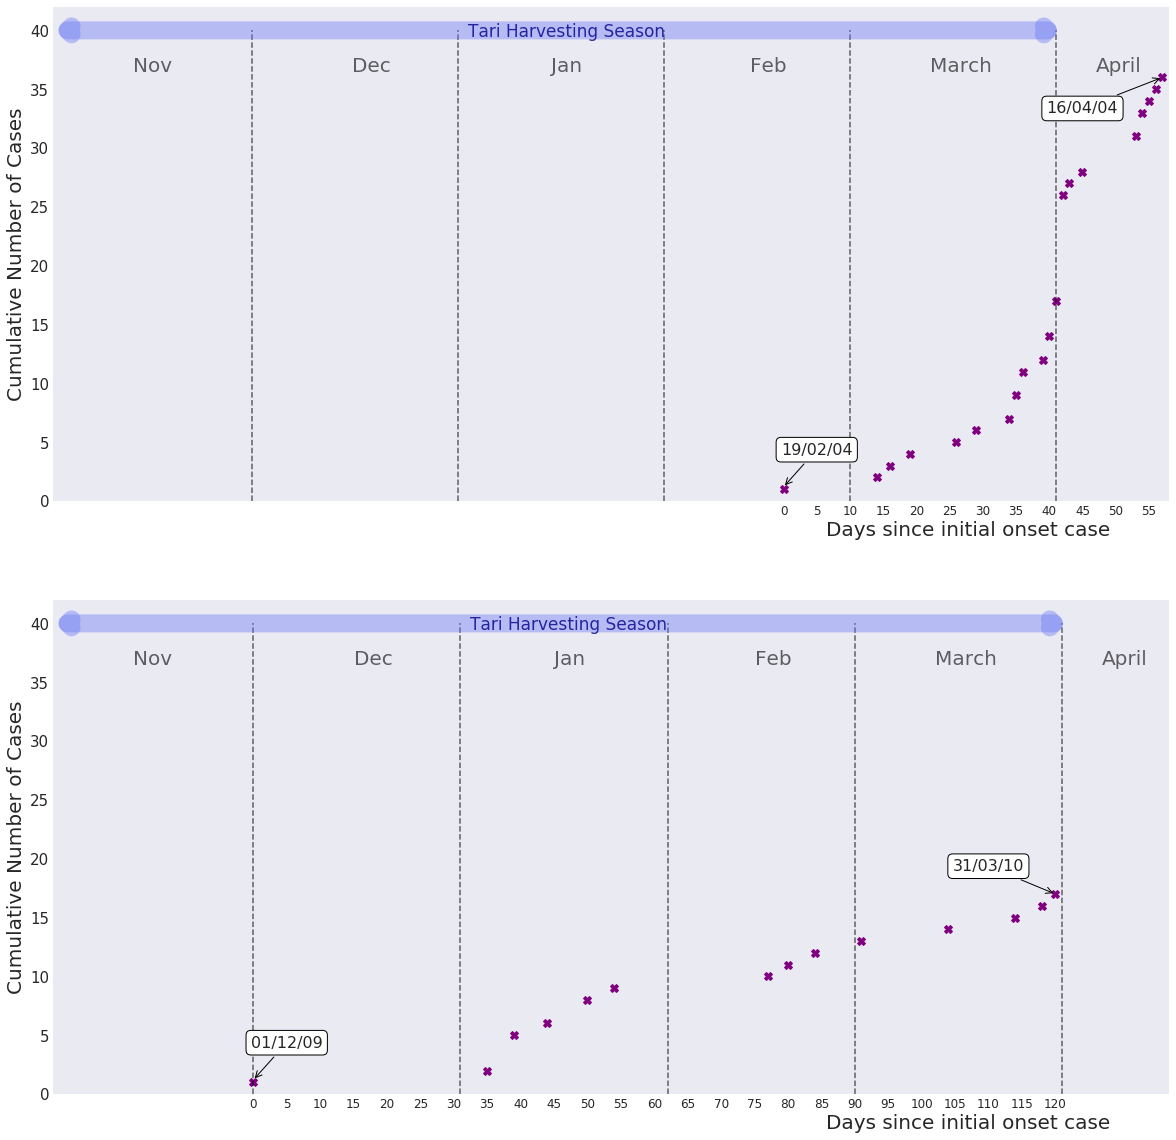

In [20]:
sns.set_style('dark')
plt.figure(figsize = (20,20))
ax1 = plt.subplot(211)
ax1.plot(records[0], data[0]['CumsumInf'], 'X', markersize = 8, color = 'purple');

an2 = ax1.annotate("{}".format(data[0]['Date'][0]), xy=(110, 1.2), xycoords="data",
                  xytext=(115, 5),
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"), fontsize = 16)
an3 = ax1.annotate("{}".format(data[0]['Date'].values[-1]), xy=(167, 36), xycoords="data",
                  xytext=(155, 34),
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"), fontsize = 16)

an4 = ax1.annotate(s='',xy=(0,40), xytext=(62+31+28+31,40) ,ha="center", multialignment='right',
            arrowprops=dict(arrowstyle= '<->, head_width=0.4', lw= 18, ec= '#6a79f7',alpha = 0.4))

ax1.plot([30, 30], [0, 40], '--', color = 'black', alpha = 0.6)
ax1.text(12, 36.5, 'Nov', color = 'black', alpha = 0.6, fontsize = 20)

plt.plot([61, 61], [0, 40], '--', color = 'black', alpha = 0.6)
ax1.text(45, 36.5, 'Dec', color = 'black', alpha = 0.6, fontsize = 20)

plt.plot([61+31, 61+31], [0, 40], '--', color = 'black', alpha = 0.6)
plt.text(75, 36.5, 'Jan', color = 'black', alpha = 0.6, fontsize = 20)

plt.plot([61+31+28, 61+31+28], [0, 40], '--', color = 'black', alpha = 0.6)
plt.text(105, 36.5, 'Feb', color = 'black', alpha = 0.6, fontsize = 20)

plt.plot([61+31+28+31, 61+31+28+31], [0, 40], '--', color = 'black', alpha = 0.6)
plt.text(132, 36.5, 'March', color = 'black', alpha = 0.6, fontsize = 20)


plt.text(157, 36.5, 'April', color = 'black', alpha = 0.6, fontsize = 20)
plt.ylim([0, 42])
plt.xlim([0,168])
ax1.set_xlim(xmin=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.text(62.5, 39.5, 'Tari Harvesting Season', color = 'darkblue', alpha = 0.8, fontsize = 17)

plt.xticks(np.arange(110, 167, 5), np.arange(0, 57, 5), fontsize = 12)

plt.ylabel('Cumulative Number of Cases', fontsize = 20)
plt.xlabel('Days since initial onset case', fontsize = 20)
ax1.xaxis.set_label_coords(0.82, -0.04)

# plt.savefig('F04_shift.pdf')

######################################################################################################
######################################################################################################
ax = plt.subplot(212)
ax.plot(records[3], data[3]['CumsumInf'], 'X', markersize = 8, color = 'purple');

an2 = ax.annotate("{}".format(data[3]['Date'][0]), xy=(30, 1.2), xycoords="data",
                  xytext=(35, 5),
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"), fontsize = 16)
an3 = ax.annotate("{}".format(data[3]['Date'].values[-1]), xy=(150, 17), xycoords="data",
                  xytext=(140, 20),
                  va="top", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->"), fontsize = 16)

an4 = ax.annotate(s='',xy=(0,40), xytext=(62+31+28+31,40) ,ha="center", multialignment='right',
            arrowprops=dict(arrowstyle= '<->, head_width=0.4', lw= 18, ec= '#6a79f7',alpha = 0.4))

ax.plot([30, 30], [0, 40], '--', color = 'black', alpha = 0.6)
ax.text(12, 36.5, 'Nov', color = 'black', alpha = 0.6, fontsize = 20)

plt.plot([61, 61], [0, 40], '--', color = 'black', alpha = 0.6)
ax.text(45, 36.5, 'Dec', color = 'black', alpha = 0.6, fontsize = 20)

plt.plot([61+31, 61+31], [0, 40], '--', color = 'black', alpha = 0.6)
plt.text(75, 36.5, 'Jan', color = 'black', alpha = 0.6, fontsize = 20)

plt.plot([61+31+28, 61+31+28], [0, 40], '--', color = 'black', alpha = 0.6)
plt.text(105, 36.5, 'Feb', color = 'black', alpha = 0.6, fontsize = 20)

plt.plot([61+31+28+31, 61+31+28+31], [0, 40], '--', color = 'black', alpha = 0.6)
plt.text(132, 36.5, 'March', color = 'black', alpha = 0.6, fontsize = 20)


plt.text(157, 36.5, 'April', color = 'black', alpha = 0.6, fontsize = 20)
plt.ylim([0, 42])
plt.xlim([0,151])
ax.set_xlim(xmin=0, xmax = 167)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.text(62.5, 39.5, 'Tari Harvesting Season', color = 'darkblue', alpha = 0.8, fontsize = 17)

plt.xticks(np.arange(30, 155, 5), np.arange(0, 125, 5), fontsize = 12)

plt.ylabel('Cumulative Number of Cases', fontsize = 20)
plt.xlabel('Days since initial onset case', fontsize = 20)
ax.xaxis.set_label_coords(0.82, -0.04)
plt.savefig('F10_shift.pdf')



